# ML with Least Square GD

In this notebook, we will use the functions in the file least_squares_GD.py. 

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.costs import *
from functions.split import *
from functions.least_squares_GD import *
from functions.helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we load the data

In [4]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

We split the data, just to see if we can predict something

In [5]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio)
nbr_param = len(x_train[0])

We plot the graph Loss vs Epochs while doing the Gradient Descent

In [6]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.1

# Initialization
gradient_losses, gradient_ws = least_squares_GD(y_train, x_train, 
                                                max_iters, gamma)

  Iter=0, loss=6300.896515844999, diff=6300.896515844999
  Iter=100, loss=83.61688053989224, diff=-6217.279635305107
  Iter=200, loss=0.8024903130258296, diff=-82.81439022686641
  Iter=299, loss=0.7584590414366766, diff=-0.04403127158915299


We just take w_star as the last w

In [7]:
w_star, min_loss = get_best_model(gradient_losses, gradient_ws)
print("Min loss = %f"%(min_loss))

Min loss = 0.758451


Compute the prediction

In [8]:
prediction(y_test, x_test, w_star)  

Good prediction: 31437/50000 (62.874000%)
Wrong prediction: 18563/50000 (37.126000%)


## Generate predictions and save ouput in csv format for submission:


We retrain on all the data.

Min loss = 0.758149


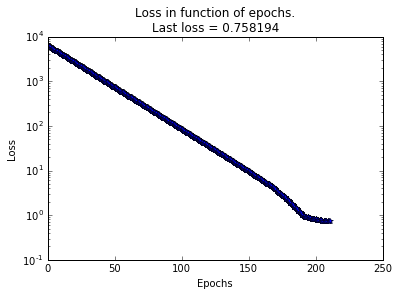

In [7]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.1

# Initialization
gradient_losses, gradient_ws = least_squares_GD(y, tX, 
                                                max_iters, gamma)
w_star, min_loss = get_best_model(gradient_losses, gradient_ws)
print("Min loss = %f"%(min_loss))

In [8]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [9]:
OUTPUT_PATH = 'output/LS_GD.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_star, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)